In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from glob import glob
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 12,8
plt.rcParams.update({'font.size': 13})


NAMES = ["../outputs/test_random_uniform_2.out", "Test Random Uniforme", "./plots/mid_res.png"]
TEST_2_FILES = "../outputs/test2/times"
TEST_3_FILES = "../outputs/test3/times"
LU_FILES = "/*LU*.csv"
EG_FILES = "/*EG*.csv"
EXP1_FILES = [
    '../outputs/low_n_mid_m1.out',
    '../outputs/mid_res.out',
    '../outputs/mid_m1_high_n.out',
    '../outputs/mid_n_high_m1.out',
    '../outputs/low_res.out',
    '../outputs/low_m1_mid_n.out',
    '../outputs/high_res.out'
]
NANOSECOND = 1e-9

In [42]:
df_eg = None
# EG Files
for f in glob(TEST_3_FILES + EG_FILES):
#     Load csv
    df = pd.read_csv(f, header=None)
    df.columns = ['time']
    df['exp'] = f.split("/")[-1].replace("_EG_time.csv","").split("_")[0]
    df['exp'] = df['exp'].astype(int)
    if df_eg is None:
        df_eg = df
    else:
        df_eg = pd.concat([df_eg, df])
df_eg = df_eg.reset_index().sort_values(by=['exp','index'])

df_lu = None
# LU Files
for f in glob(TEST_3_FILES + LU_FILES):
    df = pd.read_csv(f, header=None)
    df.columns = ['time']
    df['exp'] = f.split("/")[-1].replace("_LU_time.csv","").split("_")[0]
    df['exp'] = df['exp'].astype(int)
    if df_lu is None:
        df_lu = df
    else:
        df_lu = pd.concat([df_lu, df])
df_lu = df_lu.reset_index().sort_values(by=['exp','index'])

In [43]:
df_eg

,index,time,exp
300,0,8687,4
301,1,4745,4
302,2,2642,4
303,3,4457,4
304,4,2375,4
...,...,...,...
415,25,4508729760,42
416,26,4518122837,42
417,27,4551679348,42
418,28,4659647507,42


In [44]:
df_lu

,index,time,exp
360,0,10829,4
361,1,2607,4
362,2,1813,4
363,3,1617,4
364,4,1594,4
...,...,...,...
25,25,6977842,42
26,26,6989738,42
27,27,6962714,42
28,28,6996126,42


In [119]:
def n3_func(x, coef=100):
    return (x * coef)**3

def n2_func(x, coef=100):
    return (x * coef)**2

In [120]:
df_eg['expected'] = df_eg.exp.apply(n3_func)
df_lu['expected'] = df_lu.exp.apply(n2_func)

In [121]:
df_eg.corr()

,index,time,exp,expected
index,1.000000e+00,0.000074,-5.002318e-16,-4.707359e-16
time,7.390773e-05,1.000000,7.725771e-01,9.465380e-01
exp,-5.002318e-16,0.772577,1.000000e+00,9.211395e-01
expected,-4.707359e-16,0.946538,9.211395e-01,1.000000e+00


In [122]:
df_lu = df_lu.rename(columns={'index':'idx'})

In [123]:
df_lu['expected'] = df_lu.apply(lambda x: n2_func(x.exp) if x['idx'] != 0 else n3_func(x.exp), axis=1)

In [50]:
df_lu.corr()

,idx,time,exp,expected
idx,1.000000e+00,-0.128136,-5.002318e-16,-0.174701
time,-1.281356e-01,1.000000,1.359940e-01,0.941945
exp,-5.002318e-16,0.135994,1.000000e+00,0.240614
expected,-1.747014e-01,0.941945,2.406141e-01,1.000000


## Exp 1

In [2]:
COLS = ['r', 'theta', 'iso']

In [3]:
low = pd.read_csv("../outputs/low_res.out", sep=" ", header=None).drop(columns=3)
mid = pd.read_csv("../outputs/mid_res.out", sep=" ", header=None).drop(columns=3)
high = pd.read_csv("../outputs/high_res.out", sep=" ", header=None).drop(columns=3)

low.columns = COLS
mid.columns = COLS
high.columns = COLS

In [4]:
min_thetas = low.theta.to_numpy()

In [9]:
gt = high[high.theta.isin(min_thetas)].r.to_numpy()

In [10]:
gt

array([6.07483, 6.07483, 6.07483, 6.07483])

In [5]:
min_thetas

array([0.      , 1.570796, 3.141593, 4.712389])

In [6]:
mid[mid.theta.isin(min_thetas)]

,r,theta,iso
0,6.014731,0.000000,500.0
8,6.014731,1.570796,500.0
16,6.014731,3.141593,500.0
24,6.014731,4.712389,500.0


,r,theta,iso
0,6.07483,0.000000,500.0
32,6.07483,1.570796,500.0
64,6.07483,3.141593,500.0
96,6.07483,4.712389,500.0


In [18]:
mse(gt, low.r)

0.41380272562500003

In [17]:
mse(gt, mid[mid.theta.isin(min_thetas)].r)

0.003611889801000015

In [38]:
for f in EXP1_FILES:
    print(f.split('/')[-1].split(".")[0].upper(), end=" & ")
    _f = pd.read_csv(f, sep=" ", header=None).drop(columns=3)
    _f.columns = COLS
    print(f"{mean_squared_error(gt, _f[_f.theta.isin(min_thetas)].r):.3f} & {mean_absolute_percentage_error(gt, _f[_f.theta.isin(min_thetas)].r):.3f} \\\\")

LOW_N_MID_M1 & 0.004 & 0.010 \\
MID_RES & 0.004 & 0.010 \\
MID_M1_HIGH_N & 0.000 & 0.000 \\
MID_N_HIGH_M1 & 0.004 & 0.010 \\
LOW_RES & 0.414 & 0.106 \\
LOW_M1_MID_N & 0.414 & 0.106 \\
HIGH_RES & 0.000 & 0.000 \\


In [40]:
abs((5.431555 - 6.014731)/(5.431555))

0.10736814779561284

---

Plot para el tiempo de ejecucion promedio de EG

In [100]:
dfef_mean = df_eg.groupby("exp")[['time','expected']].mean().reset_index()

In [125]:
dfef_mean['expected_averaged'] = dfef_mean.expected * 50000

In [143]:
dfef_mean

,exp,time,expected,expected_averaged
0,4,3.725633e+03,64.0,3.200000e+06
1,6,4.964607e+04,216.0,1.080000e+07
2,8,1.781822e+05,512.0,2.560000e+07
3,10,5.394654e+05,1000.0,5.000000e+07
4,12,1.651672e+06,1728.0,8.640000e+07
5,14,4.459434e+06,2744.0,1.372000e+08
6,16,1.063929e+07,4096.0,2.048000e+08
7,18,2.265412e+07,5832.0,2.916000e+08
8,20,4.315295e+07,8000.0,4.000000e+08
9,24,1.336629e+08,13824.0,6.912000e+08


KeyError: 'col2'

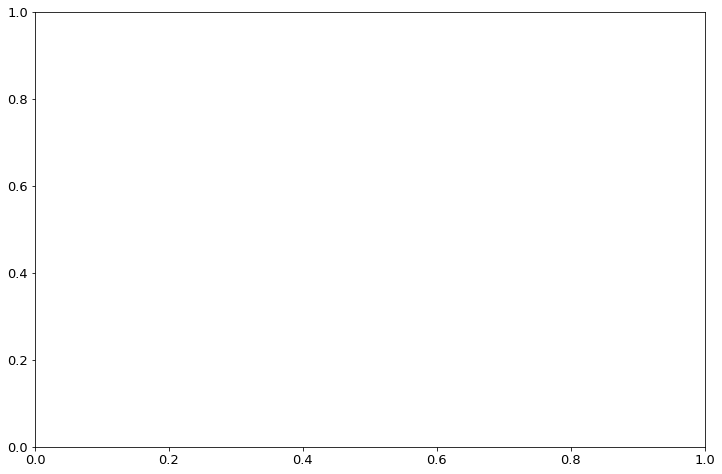

In [142]:
dfef_mean.plot.scatter(x='time', y='col2',label = 'label')
plt.legend()
plt.show()